<a href="https://colab.research.google.com/gist/Gfernandezv/09587e2f9a44188a3dc737b276d38c11/1_acccalibrationexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration'

/content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration


In [4]:
%run convert_rhd.py -d "data" hdf_file


Reading Intan Technologies RHD2000 Data File, Version 3.0

n signal groups 7
Converting /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos1.rhd (1 of 1)
Done: /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos1.h5

Reading Intan Technologies RHD2000 Data File, Version 3.0

n signal groups 7
Converting /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos2.rhd (1 of 1)
Done: /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos2.h5

Reading Intan Technologies RHD2000 Data File, Version 3.0

n signal groups 7
Converting /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos3.rhd (1 of 1)
Done: /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos3.h5

Reading Intan Technologies RHD2000 Data File, Version 3.0

n signal groups 7
Converting /content/drive/MyDrive/Colab Notebooks/IntanAccelerometerCalibration/data/pos4.rhd (1 of 1)
Done: /conte

Position setup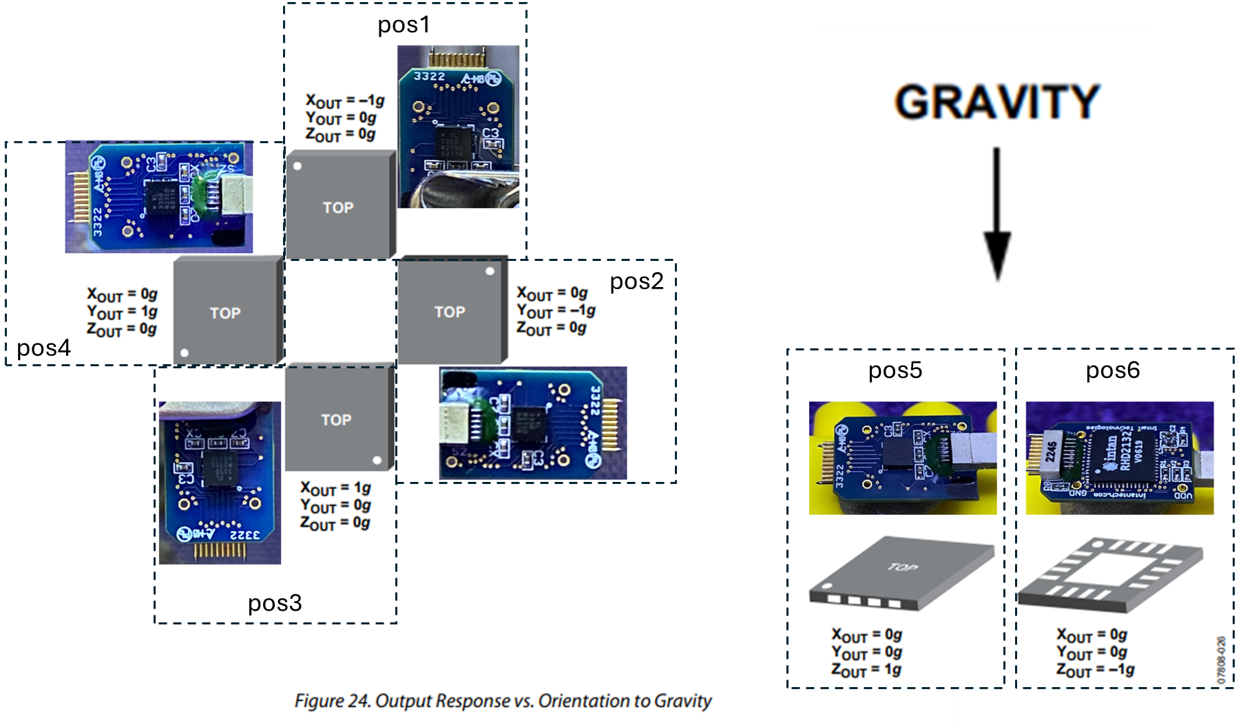

In [5]:
import h5py
import numpy as np

# Load the HDF5 file containing accelerometer, es un archivo efimero.
pos5_Data = h5py.File('data/pos5.h5')
pos6_Data = h5py.File('data/pos6.h5')
pos1_Data = h5py.File('data/pos1.h5')
pos2_Data = h5py.File('data/pos2.h5')
pos3_Data = h5py.File('data/pos3.h5')
pos4_Data = h5py.File('data/pos4.h5')

Axis/Channel relation.
in python aux1=0, aux2=1, aux3=2

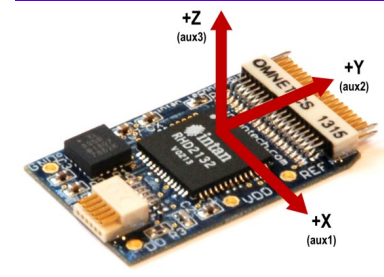

In [6]:
pos1_V=(pos1_Data['aux_input_data'][0, :])*(37.4e-6) #por factor de escala, unidades en volts
pos2_V=(pos2_Data['aux_input_data'][1, :])*(37.4e-6) #por factor de escala, unidades en volts
pos3_V=(pos3_Data['aux_input_data'][0, :])*(37.4e-6) #por factor de escala, unidades en volts
pos4_V=(pos4_Data['aux_input_data'][1, :])*(37.4e-6) #por factor de escala, unidades en volts
pos5_V=(pos5_Data['aux_input_data'][2, :])*(37.4e-6) #por factor de escala, unidades en volts
pos6_V=(pos6_Data['aux_input_data'][2, :])*(37.4e-6) #por factor de escala, unidades en volts
samplerate = (20000)/4 #la velocidad de sampleo es 1/4 de la velocidad de sampleo original

Sensitivity calculation

In [13]:
import numpy as np

Z_sensitivity=(((np.mean(pos5_V))) - ((np.mean(pos6_V))))/2 # la sensibilidad es entregada en mv/g, ya que la division real es por 2g
X_sensitivity = (((np.mean(pos3_V))) - ((np.mean(pos1_V))))/2 # la sensibilidad es entregada en mv/g, ya que la division real es por 2g
Y_sensitivity = (((np.mean(pos4_V))) - ((np.mean(pos2_V))))/2 # la sensibilidad es entregada en mv/g, ya que la division real es por 2g
print("sensitivity for Z:", Z_sensitivity)
print("sensitivity for X:", X_sensitivity)
print("sensitivity for Y:", Y_sensitivity)

sensitivity for Z: 0.3334610687245646
sensitivity for X: 0.3357219736822916
sensitivity for Y: 0.34254017580666385


0g bias for each channel.

In [ ]:
Z_gbias=(((np.mean(pos5_V))) + ((np.mean(pos6_V))))/2 #
X_gbias = (((np.mean(pos3_V))) + ((np.mean(pos1_V))))/2 #
Y_gbias = (((np.mean(pos4_V))) + ((np.mean(pos2_V))))/2 #

refs:<br>
https://intantech.com/files/Intan_RHD2000_accelerometer_calibration.pdf <br>
https://www.alldatasheet.es/datasheet-pdf/pdf/516012/AD/ADXL335_10.html